En esta Prueba se implementan técnicas de minería de texto, procesamiento del lenguaje natural y aprendizaje automático para realizar una análisis de sentimientos en Twitter; utilizando para ello un conjunto de datos almacenados en un csv, el cual contiene dos columnas: Contenido y Sentimiento del mensaje. 

Cabe mencionar que la tarea de clasificación de sentimientos es difícil incluso para los humanos, en donde a veces no posible llegar a un acuerdo respecto a la polaridad del tweet [7]. Además los textos en tweets están sujetos a errores de ortografía, abreviaciones, modismos y humor o sarcasmo [6]. De forma similar al proceso seguido en [6]; utilizamos los siguientes métodos para preprocesar los tweets: Corrección de errores: Para corregir algunos de los errores en el corpus se utilizó un diccionario en inglés, donde se introducen las correcciones ortográficas a los errores más comunes. Además se eliminaron los símbolos extras como “(”, “), ”, “!”, “.”, “:”, “;”, etc.

Se tokeniza el corpus, para generar cada palabra en un elemento único de una lista de datos, posteriormente se lematiza para corregir las singularidades.

In [1]:
# Aspectos computacionales
# Librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import func as fx

# Informacion del sistema y datos perdidos
from sinfo import sinfo
import missingno as msngo

from pandas_profiling import ProfileReport

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Machine Learning
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dmard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dmard\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\

True

In [2]:
# Aspectos computacionales, informacion del sistema
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
func                NA
matplotlib          3.5.2
missingno           0.5.1
nltk                3.7
numpy               1.22.4
pandas              1.4.2
pandas_profiling    3.3.0
seaborn             0.11.2
sinfo               0.3.4
sklearn             1.1.3
-----
IPython             8.4.0
jupyter_client      7.3.4
jupyter_core        4.10.0
jupyterlab          3.4.8
notebook            6.5.1
-----
Python 3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]
Windows-10-10.0.22000

In [3]:
help(fx.vectorize_sentiment)
help(fx.nlp_cleaning)
help(fx.clean_text)

Help on function vectorize_sentiment in module func:

vectorize_sentiment(df, sentimiento='sentiment', objetivo='content', stop_words_='english', plot=False)
    Devuelve una matriz dispersa para analisis de texto.

Help on function nlp_cleaning in module func:

nlp_cleaning(df)
    Devuelve un dataset con el preprocesamiento listo.

Help on function clean_text in module func:

clean_text(df, col_name, new_col_name)
    Funcion que limpia el dataset de caracteres especiales como A-Za-z0-9 etc.



In [4]:
df = pd.read_csv('training_tweets.csv').drop(columns = 'Unnamed: 0', axis = 1)
df.sample(5, random_state = 15820)

,content,sentiment
17932,@patrickmanning Yes PM PM you are right,happiness
8768,@Jae878 aha thanks Jae,happiness
14419,"This is my favourite shirt, because its true. ...",neutral
18237,@taylorswift13 ....... i'm wondering if you're...,worry
15206,"@taylor_d No, it's not...",neutral


La estrategia de divicion de muestra sera content como nuetsro X y sentiment como nuestro vector objetivo y

El pre procesamiento sera bajo el siguiente orden

In [5]:
df.shape

(30000, 2)

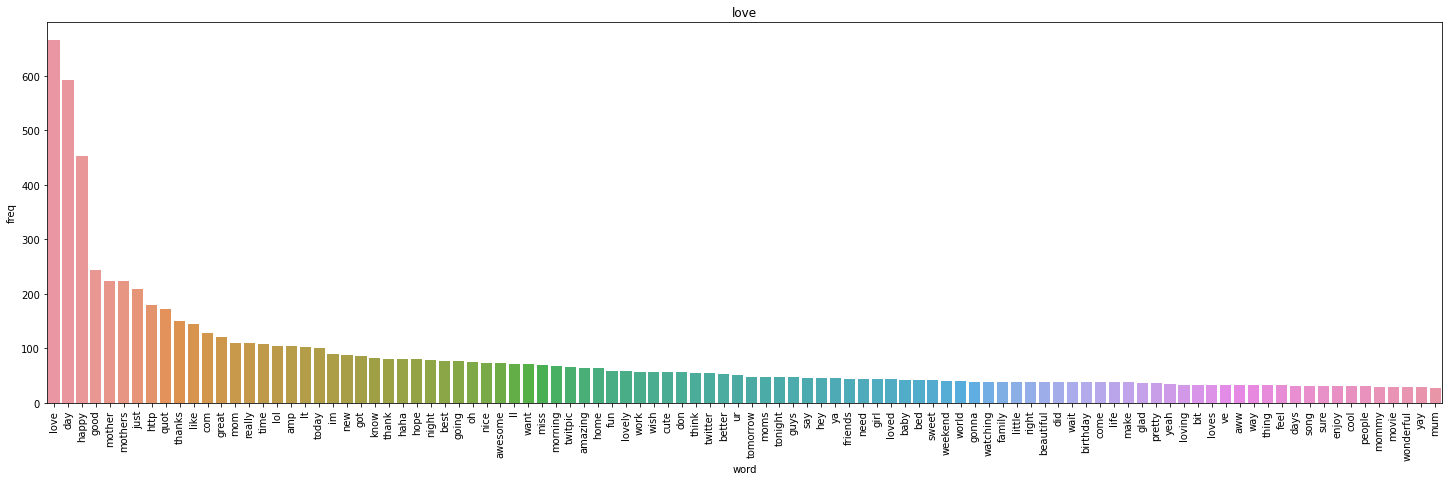

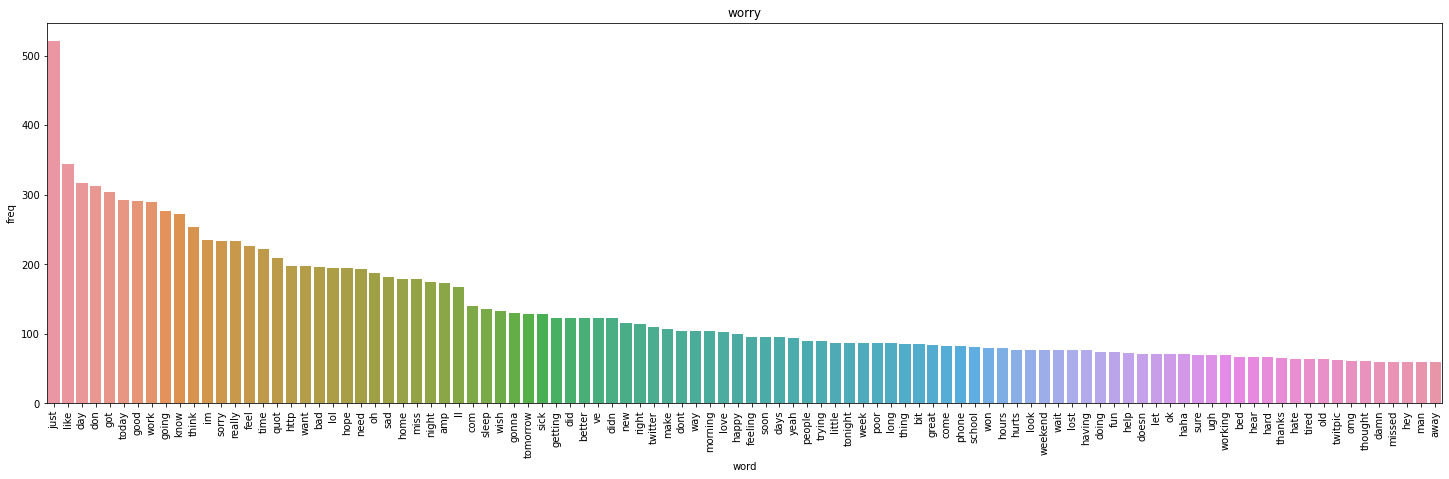

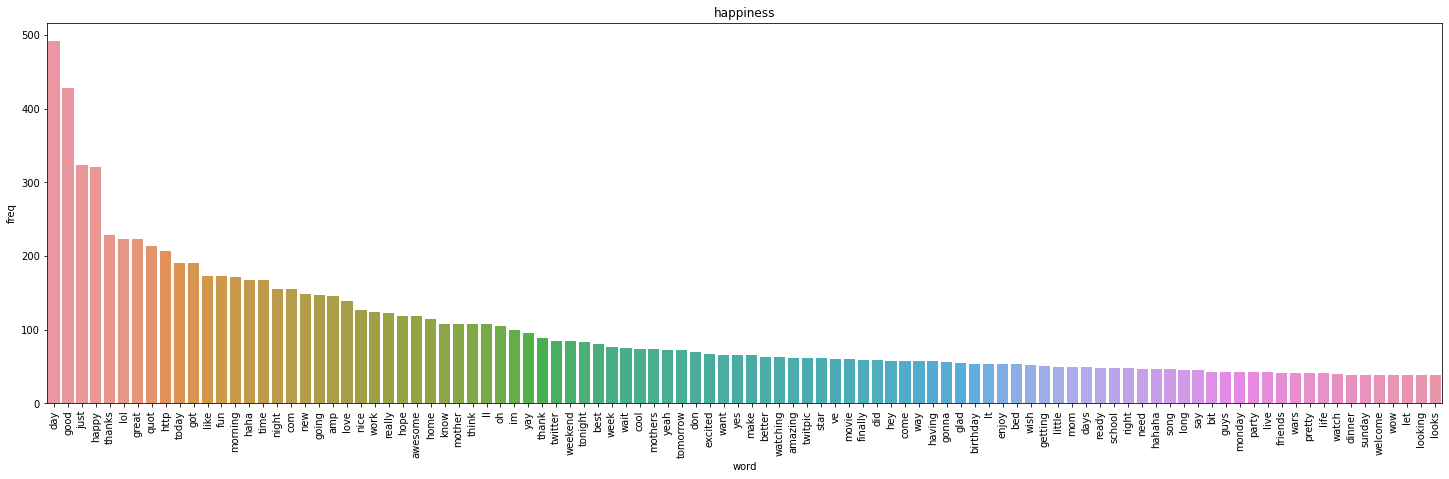

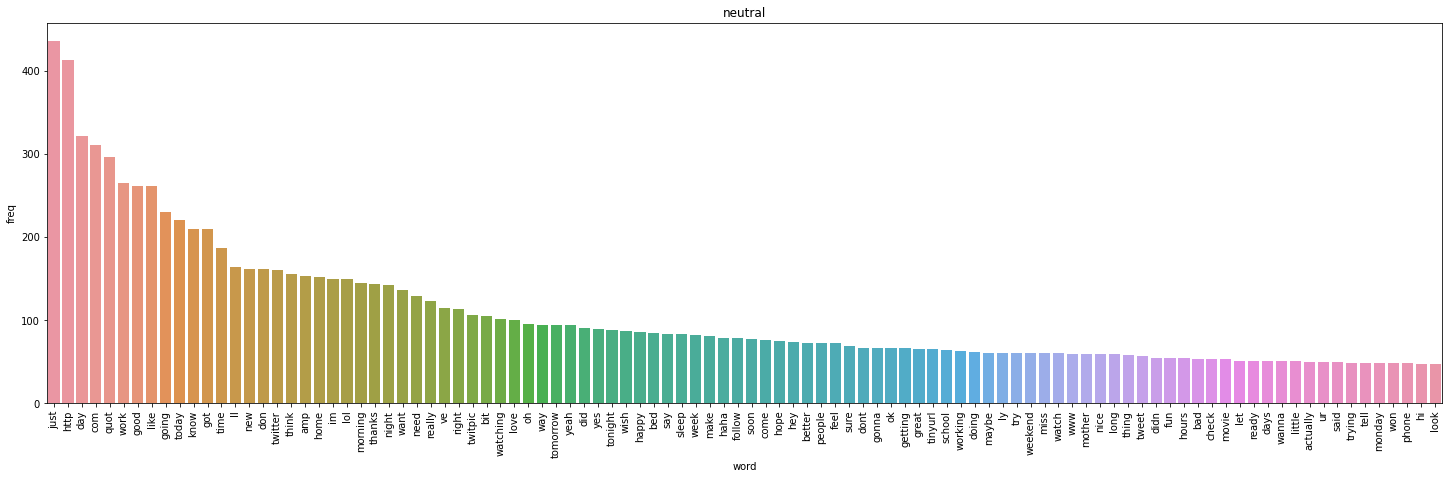

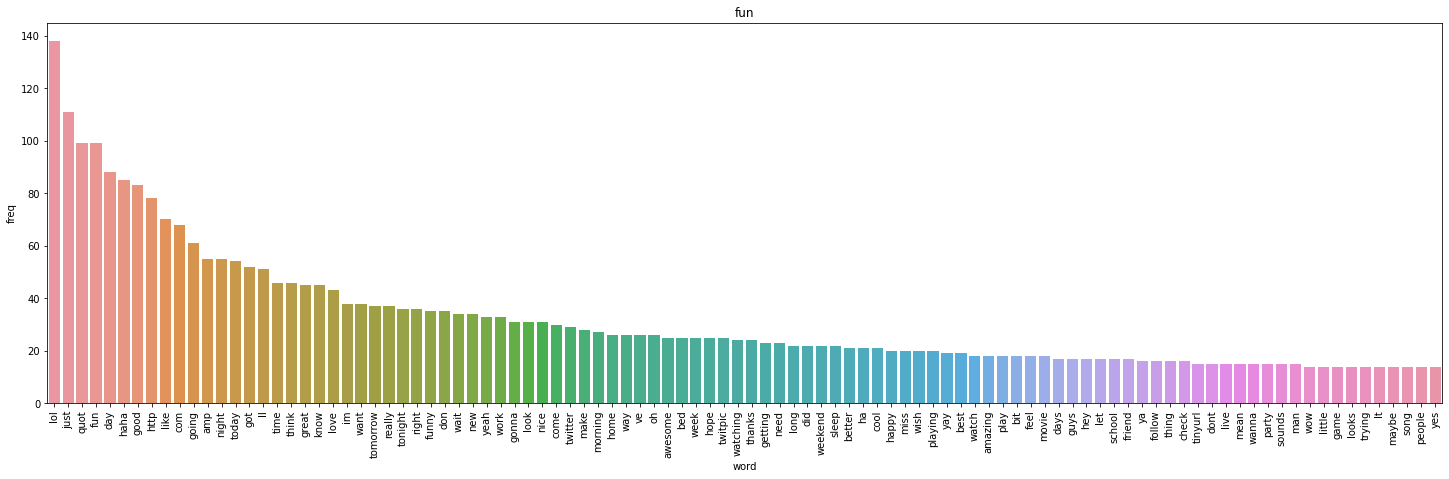

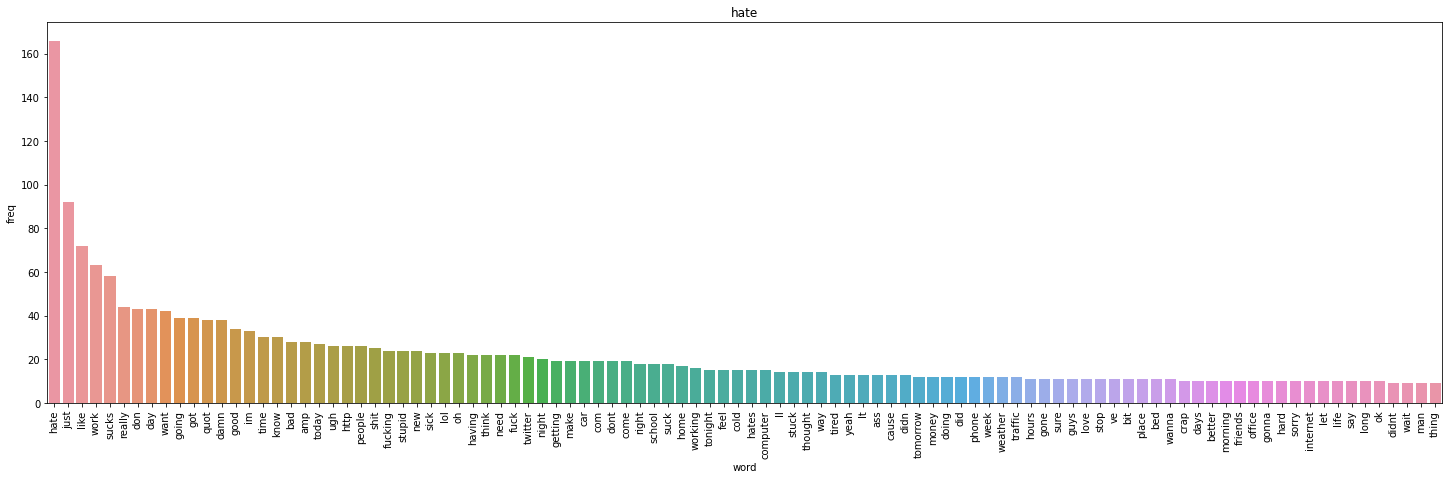

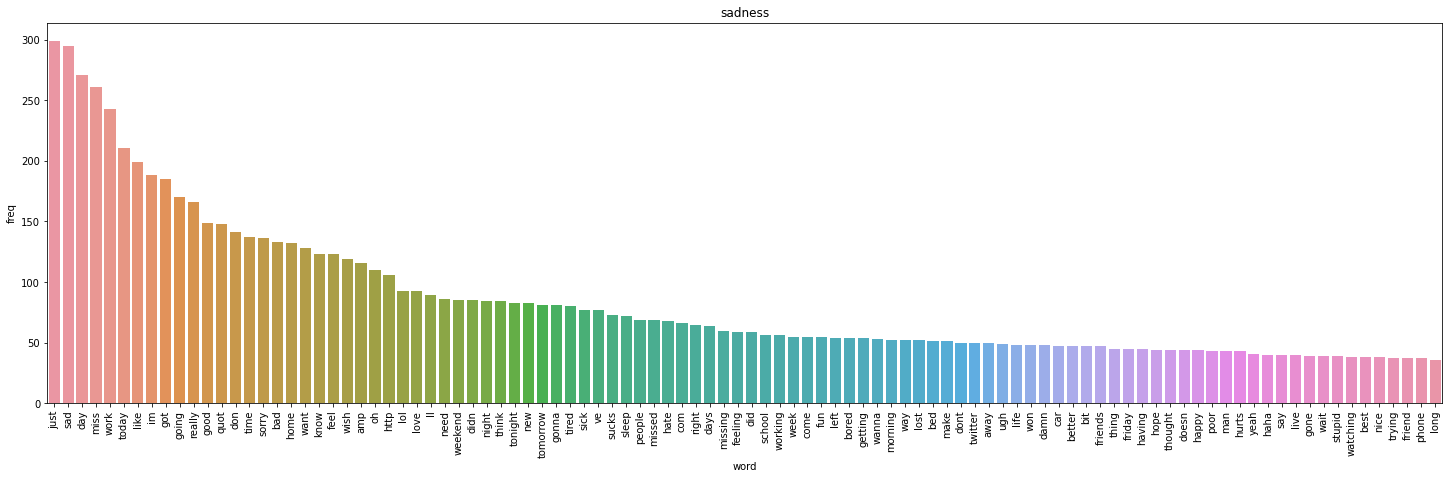

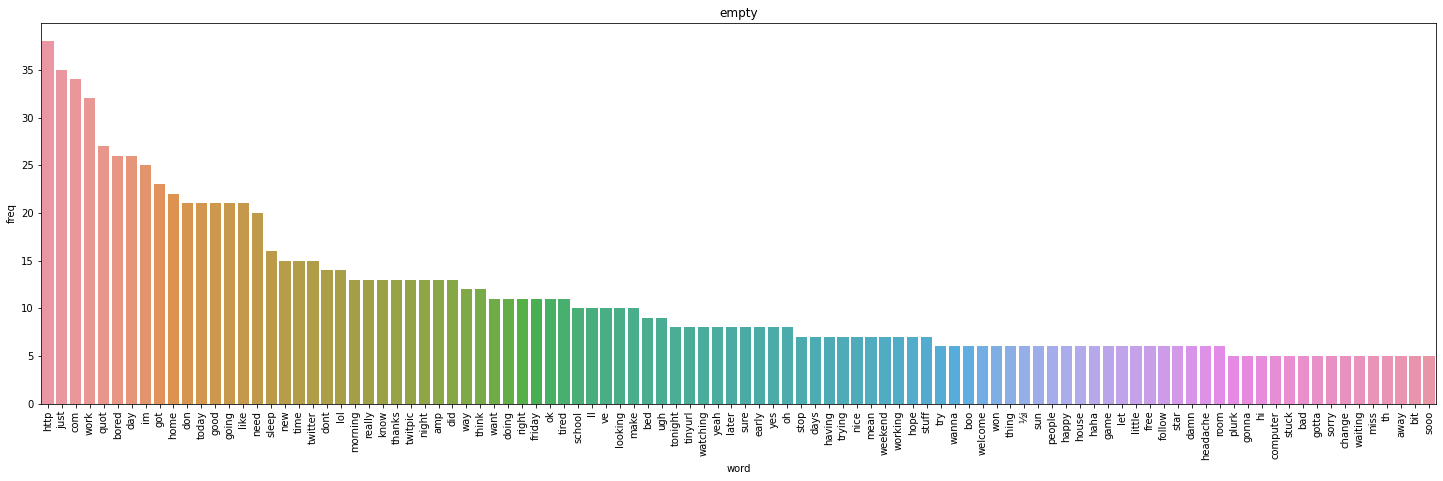

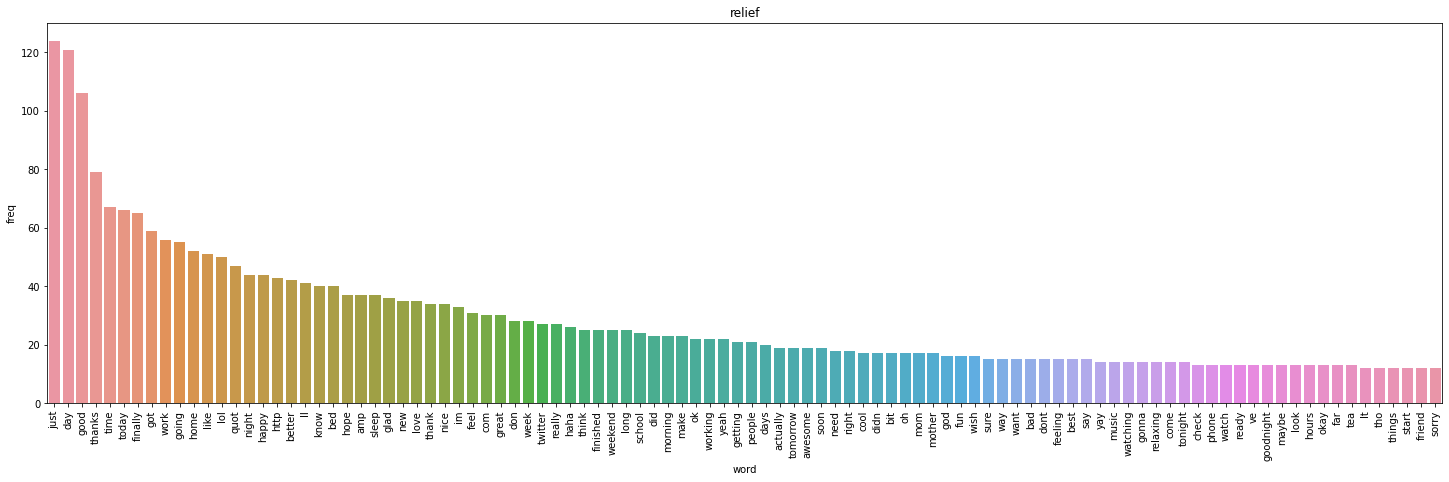

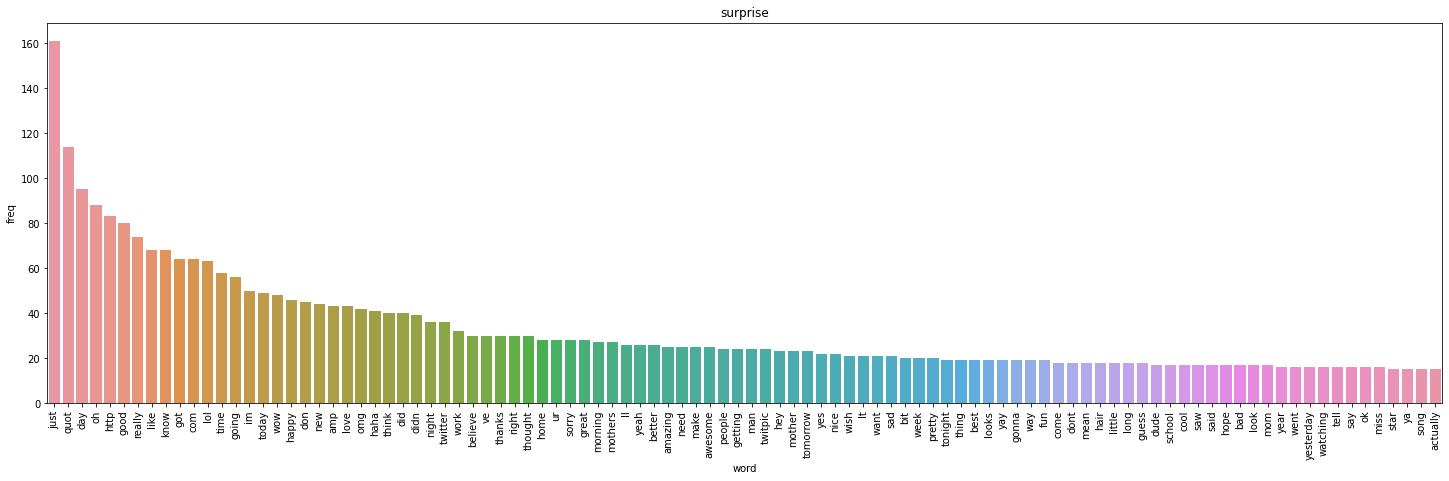

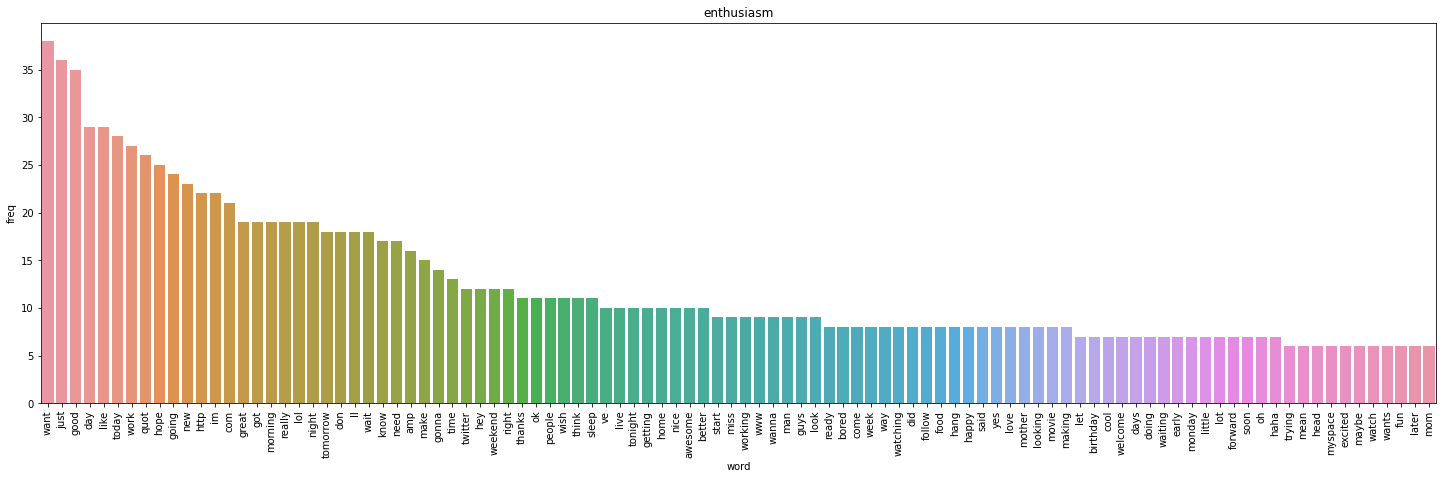

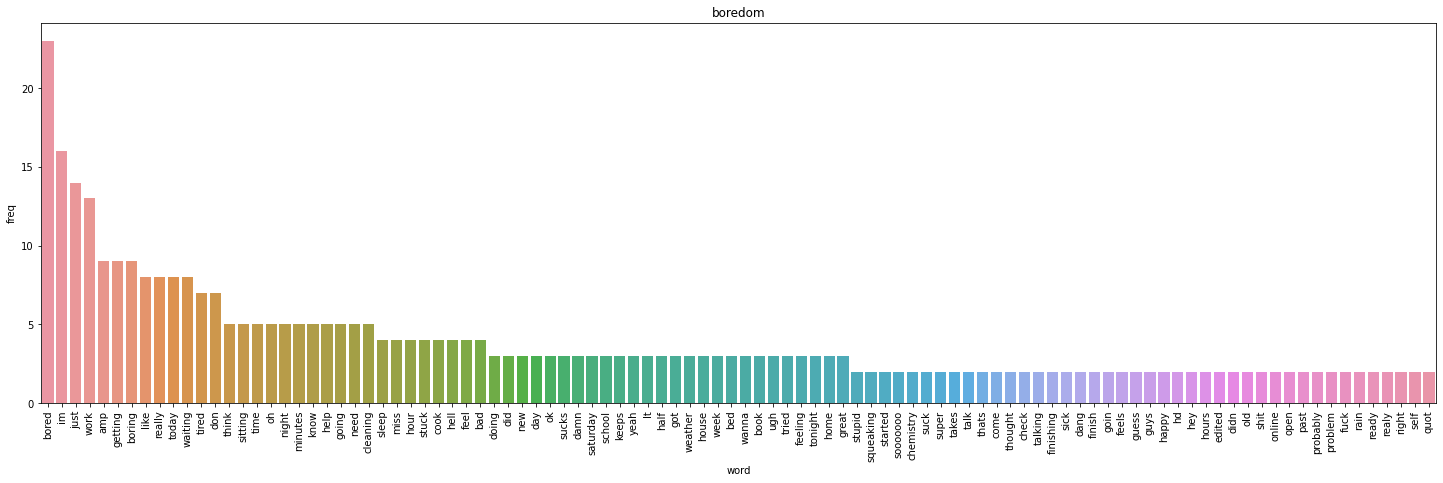

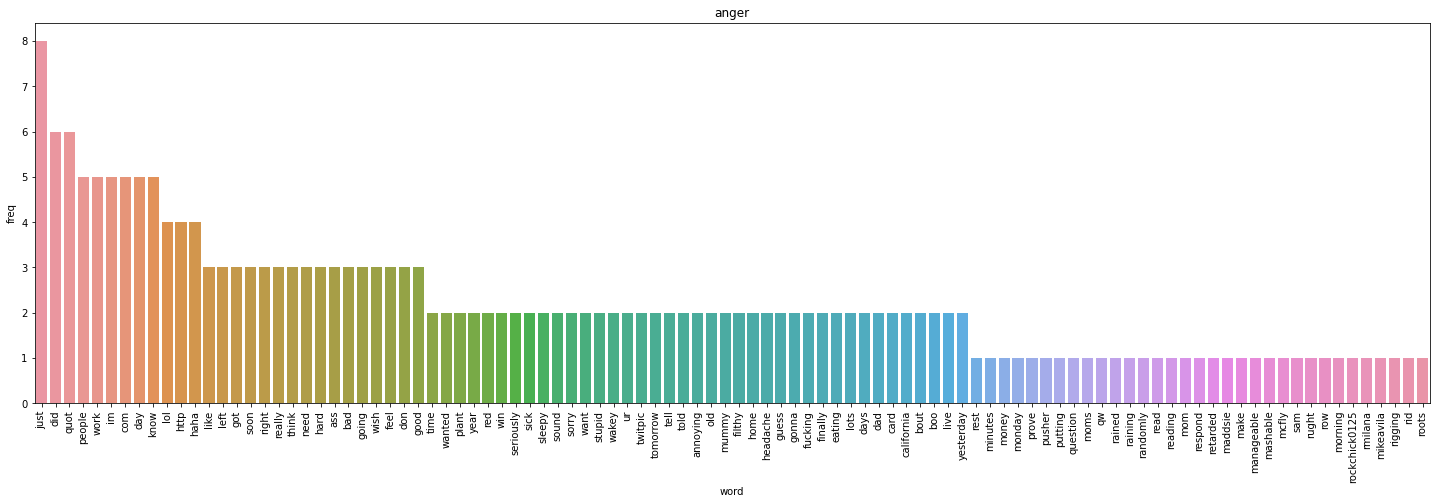

In [6]:
# Frecuecia por sentimientos de las palabras ordenadas de mayor a menor. 
for sentimiento_ in df['sentiment'].unique(): 
    fx.vectorize_sentiment(df, sentimiento = sentimiento_, plot = True)

<AxesSubplot:>

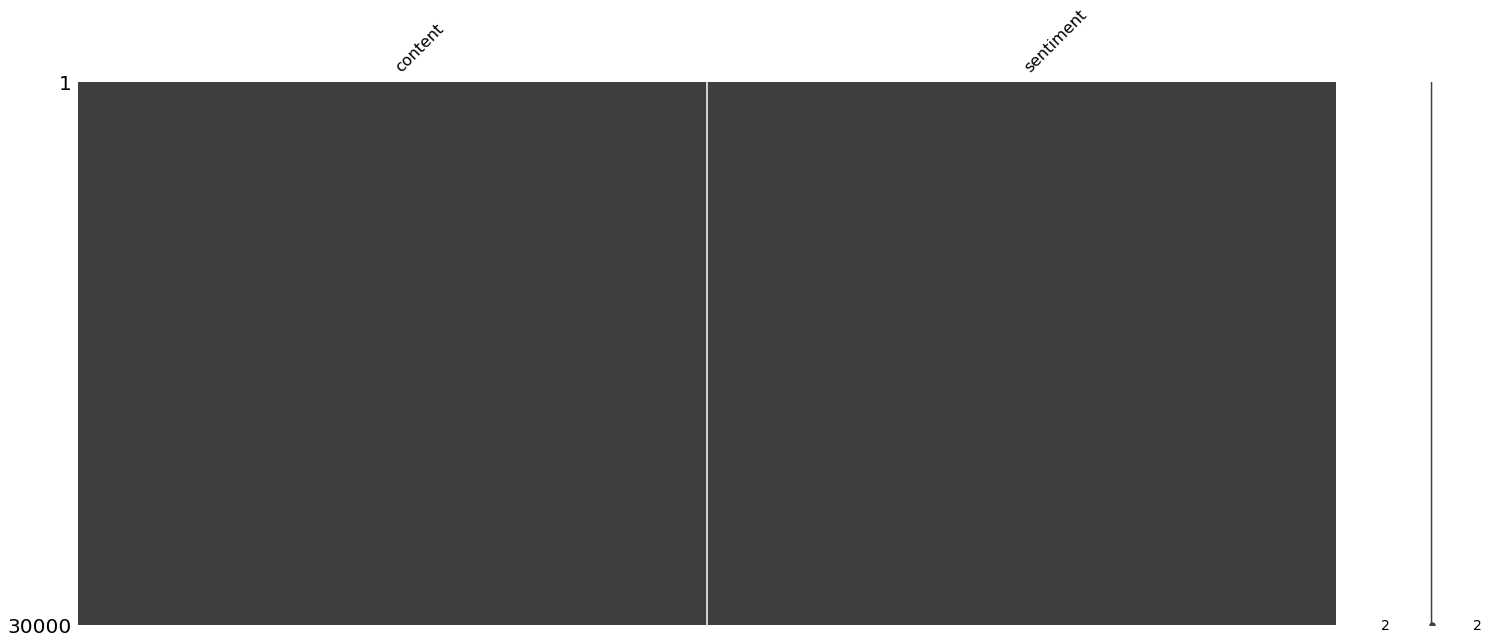

In [7]:
msngo.matrix(df)

In [8]:
print(f'''El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas''')

El dataset contiene 30000 filas y 2 columnas


In [9]:
fx.clean_text(df, 'content', 'content_clean')

,content,sentiment,content_clean
0,Happy Mama's day to all mothers,love,happy mamas day to all mothers
1,@LysdelTellez I am lost. Please help me find a...,worry,i am lost. please help me find a good home.
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,yes yes i am networking whore to the fullest....
3,you@snapplynn Wish that would have been your t...,neutral,you wish that would have been your tweet after...
4,now i am doing the MicroEconomics project iha...,worry,now i am doing the microeconomics project iha...
...,...,...,...
29995,I do not want to work tomorrow!,sadness,i do not want to work tomorrow
29996,@KandyBee we shuld do a dance like that its s...,fun,we shuld do a dance like that its seriously ...
29997,"Photo: Got my prints a few days ago, ready for...",happiness,photo got my prints a few days ago ready for t...
29998,@tove_liden Thanks for the follow Tove!,fun,liden thanks for the follow tove


In [10]:
fx.nlp_cleaning(df)

,content,sentiment,content_clean,content_norm,content_norm_stop,content_token,content_token_lemma
0,Happy Mama's day to all mothers,love,happy mama day to all mother,happy mamas day to all mothers,happy mamas day to all mothers,"[happy, mamas, day, to, all, mothers]","[happy, mama, day, to, all, mother]"
1,@LysdelTellez I am lost. Please help me find a...,worry,i am lost please help me find a good home,i am lost. please help me find a good home.,i am lost. please help me find a good home.,"[i, am, lost, ., please, help, me, find, a, go...","[i, am, lost, ., please, help, me, find, a, go..."
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,yes yes i am networking whore to the fullest ....,yes yes i am networking whore to the fullest....,yes yes i am networking whore to the fullest.....,"[yes, yes, i, am, networking, whore, to, the, ...","[yes, yes, i, am, networking, whore, to, the, ..."
3,you@snapplynn Wish that would have been your t...,neutral,you wish that would have been your tweet after...,you wish that would have been your tweet after...,you wish that would have been your tweet after...,"[you, wish, that, would, have, been, your, twe...","[you, wish, that, would, have, been, your, twe..."
4,now i am doing the MicroEconomics project iha...,worry,now i am doing the microeconomics project ihat...,now i am doing the microeconomics project iha...,now i am doing the microeconomics project ihat...,"[now, i, am, doing, the, microeconomics, proje...","[now, i, am, doing, the, microeconomics, proje..."
...,...,...,...,...,...,...,...
29995,I do not want to work tomorrow!,sadness,i do not want to work tomorrow,i do not want to work tomorrow,i do not want to work tomorrow,"[i, do, not, want, to, work, tomorrow]","[i, do, not, want, to, work, tomorrow]"
29996,@KandyBee we shuld do a dance like that its s...,fun,we shuld do a dance like that it seriously the...,we shuld do a dance like that its seriously ...,we shuld do a dance like that its seriously th...,"[we, shuld, do, a, dance, like, that, its, ser...","[we, shuld, do, a, dance, like, that, it, seri..."
29997,"Photo: Got my prints a few days ago, ready for...",happiness,photo got my print a few day ago ready for the...,photo got my prints a few days ago ready for t...,photo got my prints a few days ago ready for t...,"[photo, got, my, prints, a, few, days, ago, re...","[photo, got, my, print, a, few, day, ago, read..."
29998,@tove_liden Thanks for the follow Tove!,fun,liden thanks for the follow tove,liden thanks for the follow tove,liden thanks for the follow tove,"[liden, thanks, for, the, follow, tove]","[liden, thanks, for, the, follow, tove]"


In [11]:
df.sample(7, random_state = 15820)

,content,sentiment,content_clean,content_norm,content_norm_stop,content_token,content_token_lemma
17932,@patrickmanning Yes PM PM you are right,happiness,yes pm pm you are right,yes pm pm you are right,yes pm pm you are right,"[yes, pm, pm, you, are, right]","[yes, pm, pm, you, are, right]"
8768,@Jae878 aha thanks Jae,happiness,aha thanks jae,aha thanks jae,aha thanks jae,"[aha, thanks, jae]","[aha, thanks, jae]"
14419,"This is my favourite shirt, because its true. ...",neutral,this is my favourite shirt because it true lt ...,this is my favourite shirt because its true. ...,this is my favourite shirt because its true. l...,"[this, is, my, favourite, shirt, because, its,...","[this, is, my, favourite, shirt, because, it, ..."
18237,@taylorswift13 ....... i'm wondering if you're...,worry,....... im wondering if youre a awake a i am,....... im wondering if youre as awake as i am.,....... im wondering if youre as awake as i am.,"[......., im, wondering, if, youre, as, awake,...","[......., im, wondering, if, youre, a, awake, ..."
15206,"@taylor_d No, it's not...",neutral,d no it not ...,d no its not...,d no its not...,"[d, no, its, not, ...]","[d, no, it, not, ...]"
1320,@jonasbrothers pleaseeeee .. it was the only t...,worry,pleaseeeee .. it wa the only thing i wanted fo...,pleaseeeee .. it was the only thing i wanted ...,pleaseeeee .. it was the only thing i wanted f...,"[pleaseeeee, .., it, was, the, only, thing, i,...","[pleaseeeee, .., it, wa, the, only, thing, i, ..."
3225,First Natalie and now little Holly. This is mean,worry,first natalie and now little holly this is mean,first natalie and now little holly. this is mean,first natalie and now little holly. this is mean,"[first, natalie, and, now, little, holly, ., t...","[first, natalie, and, now, little, holly, ., t..."


In [12]:
vect = CountVectorizer()
vect_fit = vect.fit_transform(df['content_clean'])

In [13]:
words = vect.get_feature_names()
words_freq = vect_fit.toarray().sum(axis = 0)

In [14]:
df_words = pd.DataFrame(zip(words, words_freq), columns = ['words', 'words_freq'])

df_words.sort_values(by = ['words_freq'], ascending = False)

,words,words_freq
23588,to,10741
23204,the,9713
11967,it,6598
15593,my,6005
786,and,5627
...,...,...
10952,hostel,1
10948,hospitol,1
10946,hospice,1
10943,hosanna,1


In [15]:
df['sentiment_code'] = df['sentiment'].replace(['worry'  , 'happiness'  , 'sadness'  , 'love'  , 'surprise'  , 'fun'  , 'relief'  , 'hate'  , 'empty'  , 'enthusiasm'  , 'boredom'  , 'anger'], 
                                    ['Negativa' , 'Positiva' , 'Negativa' , 'Positiva' , 'Positiva' , 'Positiva' , 'Positiva' , 'Negativa' , 'Negativa' , 'Positiva' , 'Negativa' , 'Negativa'])

In [16]:
sentimientos = ['Positiva', 'Negativa']
df['sentiment_code'] = [i.replace('neutral', np.random.choice(sentimientos, 1, p = [0.51, 0.49])[0]) for i in df['sentiment_code']]

In [17]:
df.sample(5, random_state = 15820)

,content,sentiment,content_clean,content_norm,content_norm_stop,content_token,content_token_lemma,sentiment_code
17932,@patrickmanning Yes PM PM you are right,happiness,yes pm pm you are right,yes pm pm you are right,yes pm pm you are right,"[yes, pm, pm, you, are, right]","[yes, pm, pm, you, are, right]",Positiva
8768,@Jae878 aha thanks Jae,happiness,aha thanks jae,aha thanks jae,aha thanks jae,"[aha, thanks, jae]","[aha, thanks, jae]",Positiva
14419,"This is my favourite shirt, because its true. ...",neutral,this is my favourite shirt because it true lt ...,this is my favourite shirt because its true. ...,this is my favourite shirt because its true. l...,"[this, is, my, favourite, shirt, because, its,...","[this, is, my, favourite, shirt, because, it, ...",Positiva
18237,@taylorswift13 ....... i'm wondering if you're...,worry,....... im wondering if youre a awake a i am,....... im wondering if youre as awake as i am.,....... im wondering if youre as awake as i am.,"[......., im, wondering, if, youre, as, awake,...","[......., im, wondering, if, youre, a, awake, ...",Negativa
15206,"@taylor_d No, it's not...",neutral,d no it not ...,d no its not...,d no its not...,"[d, no, its, not, ...]","[d, no, it, not, ...]",Negativa


In [18]:
# Distribucion del vector objetivo
df['sentiment_code'].value_counts()

Negativa    15100
Positiva    14900
Name: sentiment_code, dtype: int64

<AxesSubplot:xlabel='sentiment_code', ylabel='count'>

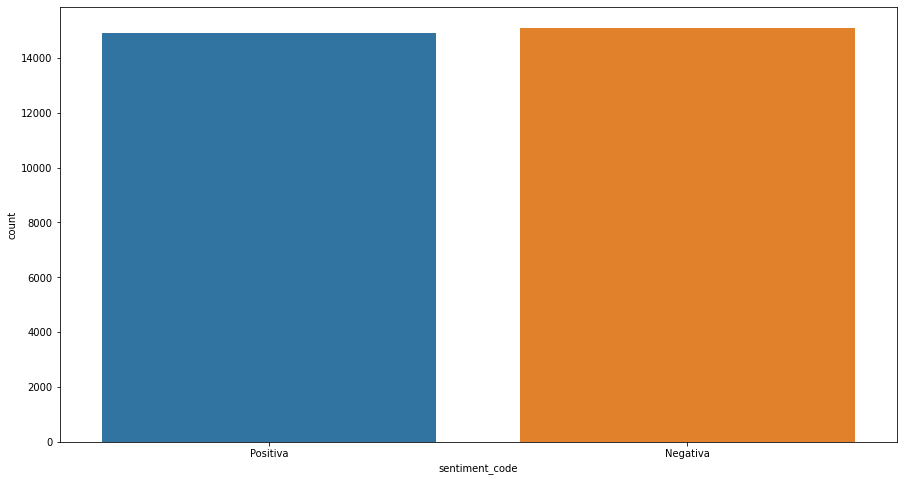

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(x = df['sentiment_code'])

In [20]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['content_clean'])
y = df['sentiment_code']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 15820)

In [22]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
clf_nb = MultinomialNB().fit(X_train_tfidf, y_train)

In [23]:
y_hat_nb = clf_nb.predict(X_test)
print(classification_report(y_hat_nb, y_test))

              precision    recall  f1-score   support

    Negativa       0.71      0.68      0.70      5322
    Positiva       0.65      0.68      0.66      4578

    accuracy                           0.68      9900
   macro avg       0.68      0.68      0.68      9900
weighted avg       0.68      0.68      0.68      9900



In [24]:
clf_rf = RandomForestClassifier(max_depth = 2, random_state = 15820)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=15820)

In [25]:
y_hat_rf = clf_rf.predict(X_test)
print(classification_report(y_hat_rf, y_test))

              precision    recall  f1-score   support

    Negativa       0.48      0.70      0.57      3457
    Positiva       0.79      0.59      0.68      6443

    accuracy                           0.63      9900
   macro avg       0.63      0.65      0.62      9900
weighted avg       0.68      0.63      0.64      9900



In [26]:
clf_svc = make_pipeline(LinearSVC(random_state = 15820, tol = 1e-5))
clf_svc.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(random_state=15820, tol=1e-05))])

In [27]:
y_hat_svc = clf_svc.predict(X_test)
print(classification_report(y_hat_svc, y_test))

              precision    recall  f1-score   support

    Negativa       0.64      0.66      0.65      4920
    Positiva       0.65      0.63      0.64      4980

    accuracy                           0.65      9900
   macro avg       0.65      0.65      0.65      9900
weighted avg       0.65      0.65      0.65      9900



In [28]:
gnb = GaussianNB()
model_gnb = gnb.fit(X_train.toarray(), y_train)
model_gnb

GaussianNB()

In [29]:
y_pred_gnb = model_gnb.predict(X_test.toarray())
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

    Negativa       0.53      0.83      0.65      5063
    Positiva       0.56      0.22      0.32      4837

    accuracy                           0.53      9900
   macro avg       0.54      0.53      0.48      9900
weighted avg       0.54      0.53      0.49      9900



In [30]:
clf_lg = LogisticRegression(random_state=15820).fit(X_train, y_train)
clf_lg

LogisticRegression(random_state=15820)

In [31]:
y_hat_lg = clf_lg.predict(X_test)
print(classification_report(y_hat_lg, y_test))

              precision    recall  f1-score   support

    Negativa       0.66      0.69      0.67      4887
    Positiva       0.68      0.66      0.67      5013

    accuracy                           0.67      9900
   macro avg       0.67      0.67      0.67      9900
weighted avg       0.67      0.67      0.67      9900

